# Leaky Aquifer Test
**This example is taken from AQTESOLV examples.**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ttim import *

Set basic parameters:

In [2]:
Q = 24464.06 #constant discharge in m^3/d
b1 = 6.096 #overlying aquitard thickness in m
b2 = 15.24 #aquifer thickness in m
zt = -b1 #top boundary of aquifer
zb = -b1 - b2 #bottom boundary of aquifer
rw = 0.1524 #well radius in m

Load dataset of observation wells:

In [3]:
data1 = np.loadtxt('data/texas40.txt')
t1 = data1[:, 0]
h1 = data1[:, 1]
r1 = 12.191 #distance between obs1 to pumping well in m

data2 = np.loadtxt('data/texas80.txt')
t2 = data2[:, 0]
h2 = data2[:, 1]
r2 = 24.383 #distance between obs2 to pumping well in m

data3 = np.loadtxt('data/texas160.txt')
t3 = data3[:, 0]
h3 = data3[:, 1]
r3 = 48.766 #distance between obs3 to pumping well in m

Create conceptual model:

In [4]:
ml_0 = ModelMaq(kaq=10, z=[0, zt, zb], Saq=0.001, Sll=0, c=10, tmin=0.001, \
                tmax=1, topboundary='semi')
w_0 = Well(ml_0, xw=0, yw=0, rw=rw, tsandQ=[(0, Q)], layers=0)
ml_0.solve()

self.neq  1
solution complete


Calibrate with three datasets simultaneously：

In [5]:
#unknown parameters: kaq, Saq, c, Sll
ca_0 = Calibrate(ml_0)
ca_0.set_parameter(name='kaq0', initial=10)
ca_0.set_parameter(name='Saq0', initial=1e-4)
ca_0.set_parameter_by_reference(name='Sll0', parameter=ml_0.aq.Sll, \
                                initial=1e-4, pmin=0)
ca_0.set_parameter(name='c0', initial=100)
ca_0.series(name='OW1', x=r1, y=0, t=t1, h=h1, layer=0)
ca_0.series(name='OW2', x=r2, y=0, t=t2, h=h2, layer=0)
ca_0.series(name='OW3', x=r3, y=0, t=t3, h=h3, layer=0)
ca_0.fit(report=True)

...............................................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 124
    # data points      = 78
    # variables        = 4
    chi-square         = 0.28305607
    reduced chi-square = 0.00382508
    Akaike info crit   = -430.267891
    Bayesian info crit = -420.841055
[[Variables]]
    kaq0:  224.580728 +/- 2.48429386 (1.11%) (init = 10)
    Saq0:  2.1316e-04 +/- 7.0488e-05 (33.07%) (init = 0.0001)
    Sll0:  1.7482e-06 +/- 5.3118e-04 (30383.82%) (init = 0.0001)
    c0:    43.8231417 +/- 3.15115666 (7.19%) (init = 100)
[[Correlations]] (unreported correlations are < 0.100)
    C(Saq0, Sll0) = -0.994
    C(kaq0, c0)   =  0.890


In [6]:
display(ca_0.parameters)
print('RMSE:', ca_0.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,224.581,2.484294,1.10619,-inf,inf,10,[224.58072771909585]
Saq0,0.000213159,0.000070,33.0681,-inf,inf,0.0001,[0.00021315894214556682]
Sll0,1.74823e-06,0.000531,30383.8,0.0,inf,0.0001,[1.7482336305274515e-06]
c0,43.8231,3.151157,7.19062,-inf,inf,100,[43.823141666697225]


RMSE: 0.06024055063827496


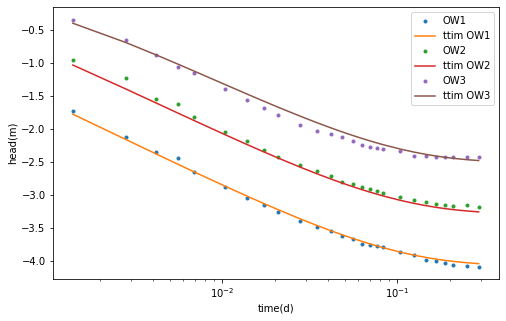

In [7]:
hm1_0 = ml_0.head(r1, 0, t1)
hm2_0 = ml_0.head(r2, 0, t2)
hm3_0 = ml_0.head(r3, 0, t3)
plt.figure(figsize = (8, 5))
plt.semilogx(t1, h1, '.', label = 'OW1')
plt.semilogx(t1, hm1_0[0], label = 'ttim OW1')
plt.semilogx(t2, h2, '.', label = 'OW2')
plt.semilogx(t2, hm2_0[0], label = 'ttim OW2')
plt.semilogx(t3, h3, '.', label = 'OW3')
plt.semilogx(t3, hm3_0[0], label = 'ttim OW3')
plt.xlabel('time(d)')
plt.ylabel('head(m)')
plt.legend();

Since the value of Sll is very close to the minimum limit (zero), Sll is set to 0 and removed from the calibration of the following model.

In [8]:
ml_1 = ModelMaq(kaq=10, z=[0, zt, zb], Saq=0.001, Sll=0, c=10, tmin=0.001, \
                tmax=1, topboundary='semi')
w_1 = Well(ml_1, xw=0, yw=0, rw=rw, tsandQ=[(0, Q)], layers=0)
ml_1.solve()

self.neq  1
solution complete


In [9]:
#unknown parameters: kaq, Saq, c
ca_1 = Calibrate(ml_1)
ca_1.set_parameter(name='kaq0', initial=10)
ca_1.set_parameter(name='Saq0', initial=1e-4)
ca_1.set_parameter(name='c0', initial=100)
ca_1.series(name='OW1', x=r1, y=0, t=t1, h=h1, layer=0)
ca_1.series(name='OW2', x=r2, y=0, t=t2, h=h2, layer=0)
ca_1.series(name='OW3', x=r3, y=0, t=t3, h=h3, layer=0)
ca_1.fit(report=True)

............................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 78
    # variables        = 3
    chi-square         = 0.28305319
    reduced chi-square = 0.00377404
    Akaike info crit   = -432.268684
    Bayesian info crit = -425.198558
[[Variables]]
    kaq0:  224.635209 +/- 2.46690651 (1.10%) (init = 10)
    Saq0:  2.1325e-04 +/- 7.5821e-06 (3.56%) (init = 0.0001)
    c0:    43.8842130 +/- 3.13582327 (7.15%) (init = 100)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, c0)   =  0.890
    C(kaq0, Saq0) = -0.815
    C(Saq0, c0)   = -0.595


In [10]:
display(ca_1.parameters)
print('RMSE:', ca_1.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,224.635,2.466907,1.09818,-inf,inf,10,[224.63520868741116]
Saq0,0.000213248,0.000008,3.55556,-inf,inf,0.0001,[0.0002132479209285246]
c0,43.8842,3.135823,7.14568,-inf,inf,100,[43.884212958982246]


RMSE: 0.06024024415946245


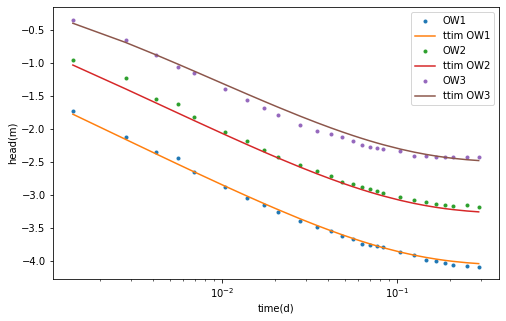

In [11]:
hm1_1 = ml_1.head(r1, 0, t1)
hm2_1 = ml_1.head(r2, 0, t2)
hm3_1 = ml_1.head(r3, 0, t3)
plt.figure(figsize = (8, 5))
plt.semilogx(t1, h1, '.', label = 'OW1')
plt.semilogx(t1, hm1_1[0], label = 'ttim OW1')
plt.semilogx(t2, h2, '.', label = 'OW2')
plt.semilogx(t2, hm2_1[0], label = 'ttim OW2')
plt.semilogx(t3, h3, '.', label = 'OW3')
plt.semilogx(t3, hm3_1[0], label = 'ttim OW3')
plt.xlabel('time(d)')
plt.ylabel('head(m)')
plt.legend();

Model with fixed Sll has similar performance with the former model. The second model has an AIC value of -432.269, which is two units lower than that of the former model (-430.268). Thus, Sll should set to zero (default value) and keep removed from the calibration.

Try adding res & rc:

In [12]:
ml_2 = ModelMaq(kaq=10, z=[0, zt, zb], Sll=0, Saq=0.001, c=10, tmin=0.001, \
                tmax=1, topboundary='semi')
w_2 = Well(ml_2, xw=0, yw=0, rw=rw, res=0, rc=None, tsandQ=[(0, Q)], layers=0)
ml_2.solve()

self.neq  1
solution complete


Calibrate with three datasets simultaneously:

When adding both res and rc into calibration and set the minimum limits as zero, the optimized res value is about 2.8e-08, which means adding res in the conceptual model has little effect on improving the performance. Thus, res is removed from the calibration.

In [13]:
#unknown parameters: kaq, Saq, c, rc
ca_2 = Calibrate(ml_2)
ca_2.set_parameter(name='kaq0', initial=10)
ca_2.set_parameter(name='Saq0', initial=1e-4)
ca_2.set_parameter(name='c0', initial=10)
ca_2.set_parameter_by_reference(name='rc', parameter=w_2.rc, initial=0)
ca_2.series(name='OW1', x=r1, y=0, t=t1, h=h1, layer=0)
ca_2.series(name='OW2', x=r2, y=0, t=t2, h=h2, layer=0)
ca_2.series(name='OW3', x=r3, y=0, t=t3, h=h3, layer=0)
ca_2.fit(report=True)

........................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 53
    # data points      = 78
    # variables        = 4
    chi-square         = 0.22837262
    reduced chi-square = 0.00308612
    Akaike info crit   = -447.011870
    Bayesian info crit = -437.585035
[[Variables]]
    kaq0:  227.477290 +/- 2.38398138 (1.05%) (init = 10)
    Saq0:  1.9189e-04 +/- 7.9503e-06 (4.14%) (init = 0.0001)
    c0:    45.1694641 +/- 2.92677590 (6.48%) (init = 10)
    rc:    0.58831979 +/- 0.06177175 (10.50%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, c0)   =  0.885
    C(kaq0, Saq0) = -0.799
    C(Saq0, rc)   = -0.619
    C(Saq0, c0)   = -0.552
    C(kaq0, rc)   =  0.321
    C(c0, rc)     =  0.143


In [14]:
display(ca_2.parameters)
print('RMSE:', ca_2.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,227.477,2.383981,1.04801,-inf,inf,10,[227.4772896898763]
Saq0,0.000191893,0.000008,4.14307,-inf,inf,0.0001,[0.00019189341127877495]
c0,45.1695,2.926776,6.47955,-inf,inf,10,[45.16946409782755]
rc,0.58832,0.061772,10.4997,-inf,inf,0,[0.5883197891848962]


RMSE: 0.05410964893943807


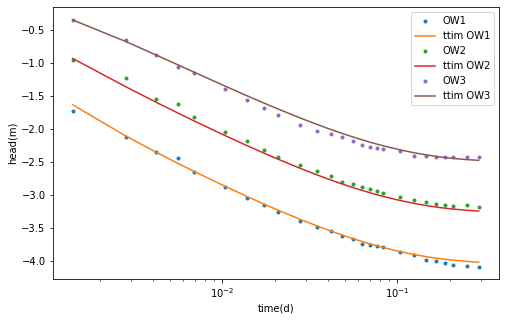

In [15]:
hm1_2 = ml_2.head(r1, 0, t1)
hm2_2 = ml_2.head(r2, 0, t2)
hm3_2 = ml_2.head(r3, 0, t3)
plt.figure(figsize = (8, 5))
plt.semilogx(t1, h1, '.', label='OW1')
plt.semilogx(t1, hm1_2[0], label='ttim OW1')
plt.semilogx(t2, h2, '.', label='OW2')
plt.semilogx(t2, hm2_2[0], label='ttim OW2')
plt.semilogx(t3, h3, '.', label='OW3')
plt.semilogx(t3, hm3_2[0], label='ttim OW3')
plt.xlabel('time(d)')
plt.ylabel('head(m)')
plt.legend();

## Summary of values simulated by AQTESOLV

In [16]:
t = pd.DataFrame(columns=['k [m/d]', 'Ss [1/m]', 'c [d]', 'rc'], \
                index=['AQTESOLV', 'ttim', 'ttim-rc'])
t.loc['AQTESOLV'] = [224.726, 2.125e-4, 43.964, '-']
t.loc['ttim'] = np.append(ca_1.parameters['optimal'].values, '-')
t.loc['ttim-rc'] = ca_2.parameters['optimal'].values
t['RMSE'] = [0.059627, ca_1.rmse(), ca_2.rmse()]
t

,k [m/d],Ss [1/m],c [d],rc,RMSE
AQTESOLV,224.726,0.0002125,43.964,-,0.059627
ttim,224.635,0.000213248,43.8842,-,0.060240
ttim-rc,227.477,0.000191893,45.1695,0.58832,0.054110
